### Normalized Discounted Cumulative Gain
Метрика в ранжировании, учитывающая порядок элементов в выдаче

* https://www.geeksforgeeks.org/normalized-discounted-cumulative-gain-multilabel-ranking-metrics-ml/
* https://www.youtube.com/watch?v=nCtM4Xg7e4k. 
* https://www.youtube.com/watch?v=qm1In7NH8WE
* https://medium.com/valassis-engineering-blog/p-ndcg-a-new-learning-to-rank-metric-for-large-lists-of-imbalanced-binary-data-4bee19dc4734

### Step-1: Cumulative Gain

In [9]:
from typing import List

import numpy as np


def cumulative_gain(relevance: List[float], k: int) -> float:
    """Score is cumulative gain at k (CG@k)

    Parameters
    ----------
    relevance:  `List[float]`
        Relevance labels (Ranks)
    k : `int`
        Number of elements to be counted

    Returns
    -------
    score : float
    """
    score = sum(relevance[:k])
    return score


In [10]:
relevance = [0.99, 0.94, 0.88, 0.74, 0.71, 0.68]
k = 5
print(cumulative_gain(relevance, k))

#4.26

4.26


### Step-2: Discounted Cumulative Gain

In [17]:
from typing import List

import numpy as np


def discounted_cumulative_gain(relevance: List[float], k: int, method: str = "standard") -> float:
    """Discounted Cumulative Gain

    Parameters
    ----------
    relevance : `List[float]`
        Video relevance list
    k : `int`
        Count relevance to compute
    method : `str`, optional
        Metric implementation method, takes the values​​
        `standard` - adds weight to the denominator
        `industry` - adds weights to the numerator and denominator
        `raise ValueError` - for any value

    Returns
    -------
    score : `float`
        Metric score
    """
    score = 0
    if method=='standard':
        for i, rel in enumerate(relevance[:k]):
            score += rel/(np.log2(i+2))
            
    elif method=='industry':
        for i, rel in enumerate(relevance[:k]):
            score += (2**rel-1)/(np.log2(i+2))
        
    else:
        raise ValueError
    
    return score

In [20]:
relevance = [0.99, 0.94, 0.88, 0.74, 0.71, 0.68]
k = 5
method = 'standard'
print(discounted_cumulative_gain(relevance, k, method))

#2.6164

2.6164401144680056


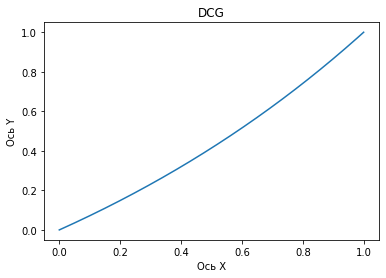

In [25]:
import matplotlib.pyplot as plt

# данные для графика
x = np.linspace(0,1,10000)
y = 2**x-1

# создаем график
plt.plot(x, y)

# добавляем заголовок и подписи осей
plt.title('DCG')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')

# показываем график
plt.show()


### Step-3: Normalized Discounted Cumulative Gain

In [30]:
from typing import List

import numpy as np


def normalized_dcg(relevance: List[float], k: int, method: str = "standard") -> float:
    """Normalized Discounted Cumulative Gain.

    Parameters
    ----------
    relevance : `List[float]`
        Video relevance list
    k : `int`
        Count relevance to compute
    method : `str`, optional
        Metric implementation method, takes the values
        `standard` - adds weight to the denominator
        `industry` - adds weights to the numerator and denominator
        `raise ValueError` - for any value

    Returns
    -------
    score : `float`
        Metric score
    """
    score = 0
    iscore = 0
    sort_relevance = sorted(relevance,reverse=True)
    if method=='standard':
        for i, rel in enumerate(relevance[:k]):
            score += rel/(np.log2(i+2)) 
        for i, sort_rel in enumerate(sort_relevance[:k]):
            iscore += sort_rel/(np.log2(i+2))    
            
    elif method=='industry':
        for i, rel in enumerate(relevance[:k]):
            score += (2**rel-1)/(np.log2(i+2))
        for i, sort_rel in enumerate(sort_relevance[:k]):
            iscore += (2**sort_rel-1)/(np.log2(i+2))
        
        
    else:
        raise ValueError
    
    return score/iscore

In [31]:
relevance = [0.99, 0.94, 0.74, 0.88, 0.71, 0.68]
k = 5
method = 'standard'
print(normalized_dcg(relevance, k, method))

#0.9962...

0.9962906539247512


### Step-4: Average Normalized Discounted Cumulative Gain

In [34]:
from typing import List

import numpy as np

def avg_ndcg(list_relevances: List[List[float]], k: int, method: str = 'standard') -> float:
    """average nDCG

    Parameters
    ----------
    list_relevances : `List[List[float]]`
        Video relevance matrix for various queries
    k : `int`
        Count relevance to compute
    method : `str`, optional
        Metric implementation method, takes the values ​​\
        `standard` - adds weight to the denominator\
        `industry` - adds weights to the numerator and denominator\
        `raise ValueError` - for any value

    Returns
    -------
    score : `float`
        Metric score
    """
    list_score = []
    if method=='standard':
        for relevance in list_relevances:
            score = 0
            iscore = 0
            sort_relevance = sorted(relevance,reverse=True)
            for i, rel in enumerate(relevance[:k]):
                score += rel/(np.log2(i+2)) 
            for i, sort_rel in enumerate(sort_relevance[:k]):
                iscore += sort_rel/(np.log2(i+2))    
            list_score.append(score/iscore)
            
    elif method=='industry':
        for relevance in list_relevances:
            score = 0
            iscore = 0
            sort_relevance = sorted(relevance,reverse=True)
            for i, rel in enumerate(relevance[:k]):
                score += (2**rel-1)/(np.log2(i+2))
            for i, sort_rel in enumerate(sort_relevance[:k]):
                iscore += (2**sort_rel-1)/(np.log2(i+2))
            list_score.append(score/iscore)
        
    else:
        raise ValueError
    
    return sum(list_score)/len(list_score)

In [35]:
list_relevances = [
        [0.99, 0.94, 0.88, 0.89, 0.72, 0.65],
        [0.99, 0.92, 0.93, 0.74, 0.61, 0.68], 
        [0.99, 0.96, 0.81, 0.73, 0.76, 0.69]
    ]  
k = 5
method = 'standard'
print(avg_ndcg(list_relevances, k, method))

#0.99613...

0.9961322104432755
